# Introduction

Football/soccer is the world's most popular sport, and of course, like every popular thing, it is modeled in video games. FIFA, published by EA Sports, is a annually released football video game. FIFA features real life teams and players; it aassigns ratings to players, both for individual skills such as free kicks or tackling and also more general ratings such as their overall rating. The overall rating is supposed to represent how good a player is overall. This value is on a scale of 0 to 99 though the lowest rated player in the game is a 47 and the highest is a 93. 

There's always been a lot of discussion around FIFA ratings and whether they reflect a player's real life performance. Of course, it is almost human nature to love discussing assigning numbers to things. Because of this, I wanted to explore whether FIFA ratings are truly representative of a player's real life performances as seen in my research question:

## Research Question

### How accurately do footballers' (soccer players) FIFA attributes reflect their real-life performance?

My findings were that FIFA ratings weren't a very good indicator of real life performance. There was an average difference of around 3 between the predicted overall rating from my linear regression model and the player's actual rating in my test set and my model only predicted the overall rating correctly 10% of the time. Analysis of non-playing factors such as a player's league or whether they are partnered with FIFA which theoretically shound't have an impact on FIFA's overall rating assuming that it is calculated solely from real life performances actually showed that these non playing factors did have a small impact on player's overalls. Though more analysis and a bigger sample size would be needed to find the list of factors that noticeably affect a player's FIFA overall rating, we can say for now that FIFA overall ratings aren't entirely reflective of a player's real life performance. This is important because FIFA impacts people's real life perception of soccer players even though it is supposed to be a non biased rating system. Many people get their information about football solely from FIFA and they expect it to be a fair measure of a player's skill. Thus, for example, if FIFA truly does overrate players that it is partnered with, it would not be doing justice to the person that relies on it for their opinions of Football players, and this could even be called a small form of corruption or bribery.

## Data Description

### Motivation

Note: In this analysis I will be referring to soccer as football and soccer players as footballers. It's just so much easier and more natural to write and I grew up saying football.

The [FBRef](https://fbref.com/en/) dataset was created by Sports Reference LLC who operate websites featuring data for sports such as baseball, Football, Basketball, and so on. FBRef (Football Reference) is one of Sports Reference LLC's newest sites, only being created in 2018. The purpose of this website is to provide accessible and searchable football (soccer) data to anyone who wants to look at it, ranging from the casual football fan to executives who actually make decisions for football clubs. Sports Reference LLC also have a paid service called StatHead which seems to be a more research heavy way of browsing its' data, but this service is not yet available for football. FBRef sources its' general data from the [datasportsgroup](https://datasportsgroup.com/) and its' advanced statistics such as xG from the analytics company [Statsbomb](https://statsbomb.com/). To learn more about Sports Reference LLC, see this [New York Times article](https://www.nytimes.com/2019/02/13/sports/sean-forman-sports-reference.html). As far as I know, Sports Reference LLC pays for the creation of this dataset, earning back some of the cost through advertisements on its' webpage.

The FIFA dataset is created by EA Sports for use in their annual sports game FIFA. FIFA attributes are on a scale of 1-99 with 99 being the best you can get. The attributes directly affect how these virtual players play; players with higher attributes will feel perform better in the game. EA employs a team of over 6000 volunteers to maintain and update this database weekly based on players' real-world performances. It is important to note that EA does have a financial incentive to create and maintain this dataset as it helps sell their games. Every year, EA makes revealing its' player attributes a very big marketing event, having real players react to their in-game attributes as can be seen [here](https://www.youtube.com/watch?v=AL7qrSfWGU8). Additionally, one of the game-modes in FIFA is called ultimate team in which gamers use virtual currency (which can be bought with real money) to buy 'trading cards' of players for their own 'dream' team. If one has a 'card' of a player, they can use them in-game. It is in EA's interest to release cards with high ratings so that people are inclined to spend real money to purchase these cards. Additionally, EA are partnered with a few real football teams such as Liverpool or PSG and so they might be inclined to give players in these football teams higher ratings than players in non-partnered clubs. To see more information on how EA determines FIFA players' ratings, see [this article](https://www.goal.com/en-ae/news/fifa-player-ratings-explained-how-are-the-card-number-stats/1hszd2fgr7wgf1n2b2yjdpgynu).

The FIFA data is scraped from game files by [sofifa.com](https://sofifa.com/) which then displays all of the players' attributes on its website. Sofifa generates its revenue through user advertisements. The FIFA dataset has been scraped from this website.

In this analysis, I use FBRef's player's statistics from the 2019-2020 season and FIFA 21's initial player attributes which is supposed to capture player's ratings based on their 2019-2020 season. FBRef's data (which is collected by the companies datasportsgroup and Statsbomb is collected using a combination of human labor and software which automatically detects what is happening in the game. More info can be seen [here](https://www.youtube.com/watch?v=_R04HAbG6_0). FIFA data is taken straight from the game files.

Football data in general has been used by many people for multiple purposes including trivia, research, and real executive decisions. FIFA data is used in the game and is also analyzed for research. 

### Limitations

The main limitation with this data is due to my data cleaning process. Firstly, the players included in this data set needed to play over 26 matches in their leagues. I wanted to eliminate players who did not play a substantial amount of matches and thus might skew the data in weird ways. Additionally, I cut out players from the French Ligue 1 as their league was cut short due to covid and thus only had 28 matches played in total. This minimum match requirement also means that players who transferred clubs halfway through the season were not included. Finally, due to the data-merging process between the FBRef and FIFA data being keyed with player's names, I could not allow for duplicate player names. While I didn't see any cases where this might have been a problem, this might still be important to keep in mind. Essentially the way this data needs to be looked at is that it is a dataset including players who have played a significant amount of matches in the top 4 leagues for only 1 club in the past season. Additionally, the advanced data is being provided for free by statsbomb, so it might not be as accurate as paid models. I also removed goalkeepers as they play a completely different role in the team and as such different data would be needed to analyze them.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
combined = pd.read_csv('cleaned_data.csv')

In [40]:
combined.head()

,Player,Nation,Pos,Team,League,Age,Height,Weight,MatchesPlayed,Starts,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,Aaron Cresswell,ENG,DF,West Ham,Premier League,29.0,175,66,31,31,...,66,73,75,60,68,59,71,74,78,79
1,Aaron Mooy,AUS,MF,Brighton,Premier League,28.0,173,72,31,25,...,76,75,68,70,79,73,80,72,72,69
2,Aaron Wan-Bissaka,ENG,DF,Manchester Utd,Premier League,21.0,183,72,35,34,...,46,78,83,69,64,56,76,82,85,90
3,Abdoulaye Doucouré,FRA,MF,Watford,Premier League,26.0,184,76,37,36,...,75,77,77,73,75,54,74,76,78,76
4,Achraf Hakimi,MAR,DF,Dortmund,Bundesliga,20.0,181,73,33,29,...,63,72,78,75,74,46,79,67,74,76


In [41]:
fbref = pd.read_csv('fbref.csv')
fbref.head()

,Player,Nation,Pos,Team,League,Age,Height,Weight,MatchesPlayed,Starts,...,StandardSoT,StandardSoT%,StandardSh/90,StandardSoT/90,StandardG/Sh,StandardG/SoT,StandardFK,ExpectednpxG/Sh,ExpectedG-xG,Expectednp:G-xG
0,Aaron Cresswell,ENG,DF,West Ham,Premier League,29.0,175,66,31,31,...,5,27.8,0.59,0.17,0.17,0.60,7.0,0.07,1.7,1.7
1,Aaron Mooy,AUS,MF,Brighton,Premier League,28.0,173,72,31,25,...,8,24.2,1.42,0.35,0.06,0.25,0.0,0.06,0.0,0.0
2,Aaron Wan-Bissaka,ENG,DF,Manchester Utd,Premier League,21.0,183,72,35,34,...,1,11.1,0.26,0.03,0.00,0.00,0.0,0.10,-0.9,-0.9
3,Abdoulaye Doucouré,FRA,MF,Watford,Premier League,26.0,184,76,37,36,...,12,19.4,1.77,0.34,0.06,0.33,0.0,0.09,-1.3,-1.3
4,Achraf Hakimi,MAR,DF,Dortmund,Bundesliga,20.0,181,73,33,29,...,20,52.6,1.26,0.66,0.13,0.25,3.0,0.10,1.2,1.2


In [42]:
fifa = pd.read_csv('fifa.csv')
fifa.head()

,Player,Nation,Pos,Team,League,Age,Height,Weight,Overall,Potential,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,Aaron Cresswell,ENG,DF,West Ham,Premier League,29.0,175,66,77,77,...,66,73,75,60,68,59,71,74,78,79
1,Aaron Mooy,AUS,MF,Brighton,Premier League,28.0,173,72,76,76,...,76,75,68,70,79,73,80,72,72,69
2,Aaron Wan-Bissaka,ENG,DF,Manchester Utd,Premier League,21.0,183,72,83,88,...,46,78,83,69,64,56,76,82,85,90
3,Abdoulaye Doucouré,FRA,MF,Watford,Premier League,26.0,184,76,78,80,...,75,77,77,73,75,54,74,76,78,76
4,Achraf Hakimi,MAR,DF,Dortmund,Bundesliga,20.0,181,73,83,88,...,63,72,78,75,74,46,79,67,74,76


In [43]:
list(combined.columns)

['Player',
 'Nation',
 'Pos',
 'Team',
 'League',
 'Age',
 'Height',
 'Weight',
 'MatchesPlayed',
 'Starts',
 'MinutesPlayed',
 'Goals',
 'Assists',
 'PenaltyGoals',
 'PenaltiesAtt',
 'YellowCards',
 'RedCards',
 'Per90MinutesGls',
 'Per90MinutesAst',
 'Per90MinutesG+A',
 'Per90MinutesG-PK',
 'Per90MinutesG+A-PK',
 'xG',
 'npxG',
 'xA',
 'Per90MinutesxG',
 'Per90MinutesxA',
 'Per90MinutesxG+xA',
 'Per90MinutesnpxG',
 'Per90MinutesnpxG+xA',
 '90sPlayed',
 'Tackles',
 'TacklesWon',
 'TacklesDef3rd',
 'TacklesMid3rd',
 'TacklesAtt3rd',
 'VsDribblesTkl',
 'VsDribblesAtt',
 'VsDribblesTkl%',
 'VsDribblesPast',
 'Pressures',
 'SuccessfulPressures',
 'Pressures%',
 'PressuresDef3rd',
 'PressuresMid3rd',
 'PressuresAtt3rd',
 'Blocks',
 'BlockedShots',
 'BlockedSoT',
 'BlockedPasses',
 'PassesIntercepted',
 'Tkl+Int',
 'Clearances',
 'ErrorsLeadingToShot',
 'SCA',
 'SCA90',
 'SCATypesPassLive',
 'SCATypesPassDead',
 'SCATypesDrib',
 'SCATypesSh',
 'SCATypesFld',
 'GCA',
 'GCA90',
 'GCATypesPass

# Exploratory Data Analysis

## Summary Statistics (Mostly Univariate Visualizations)

Used a few external resources to help with EDA:
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
- https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis


#### Where are players from?

In [44]:
print('Total number of countries: {}'.format(combined.Nation.nunique()))
print(combined.Nation.value_counts().head(10))

Total number of countries: 68
ESP    116
ENG     67
ITA     67
GER     60
FRA     33
BRA     30
ARG     20
NED     18
POR     17
BEL     16
Name: Nation, dtype: int64


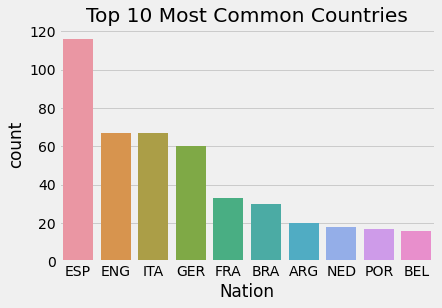

In [45]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Nation', data = combined, order = combined.Nation.value_counts().iloc[:10].index).set_title('Top 10 Most Common Countries')


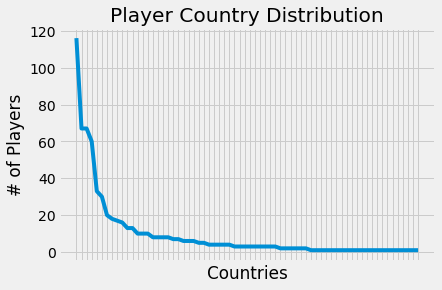

In [46]:
fig, ax = plt.subplots()
plt.plot(combined['Nation'].value_counts())
plt.setp(ax.set_title(1), visible=True, text='Player Country Distribution')
plt.setp(ax.xaxis.get_label(), visible=True, text='Countries')
plt.setp(ax.yaxis.get_label(), visible=True, text='# of Players')
plt.ylabel='# of Players'
ax.tick_params(labelbottom=False) 
plt.style.use('fivethirtyeight')
plt.show()

Text(0.5, 1.0, 'Amount of Players per League')

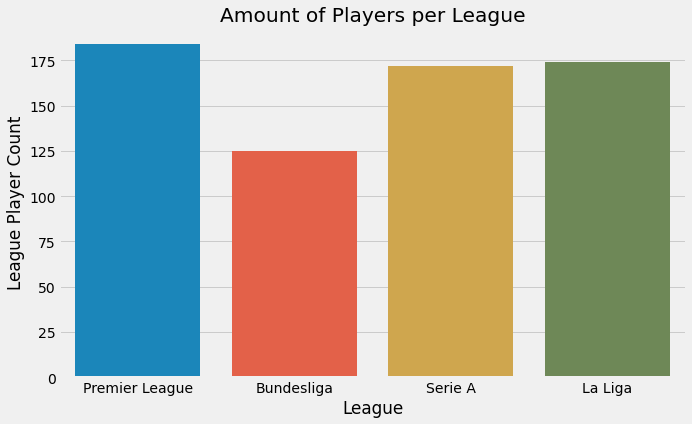

In [47]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'League', data = combined)
ax.set_xlabel(xlabel = 'League')
ax.set_ylabel(ylabel = 'League Player Count')
ax.set_title(label = 'Amount of Players per League')

#### Player Positions, FBRef & FIFA

Text(0.5, 1.0, 'Player Positions in FBRef Database')

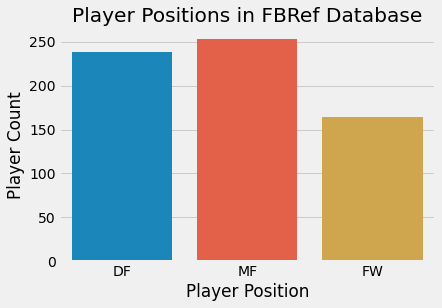

In [48]:
ax = sns.countplot(x = 'Pos', data = combined)
ax.set_xlabel(xlabel = 'Player Position')
ax.set_ylabel(ylabel = 'Player Count')
ax.set_title(label = 'Player Positions in FBRef Database')

Text(0.5, 1.0, 'Player Positions in FIFA Database')

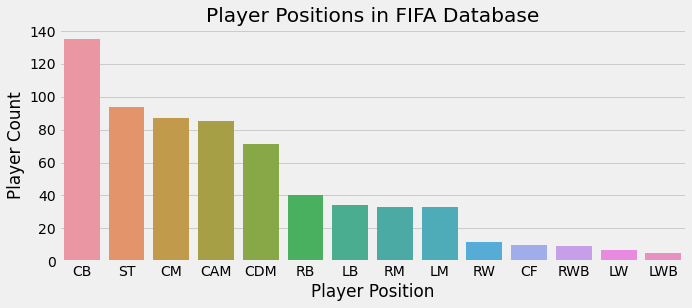

In [49]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='BestPosition', data = combined, order = combined['BestPosition'].value_counts().index)
ax.set_xlabel(xlabel = 'Player Position')
ax.set_ylabel(ylabel = 'Player Count')
ax.set_title(label = 'Player Positions in FIFA Database')

I will group FIFA player positions into the three broader positions used by the FBRef data to compare them.

In [50]:
combined.BestPosition.value_counts()

CB     135
ST      94
CM      87
CAM     85
CDM     71
RB      40
LB      34
RM      33
LM      33
RW      12
CF      10
RWB      9
LW       7
LWB      5
Name: BestPosition, dtype: int64

Text(0.5, 1.0, "Players' Fifa Positions Grouped by FBRef Positions")

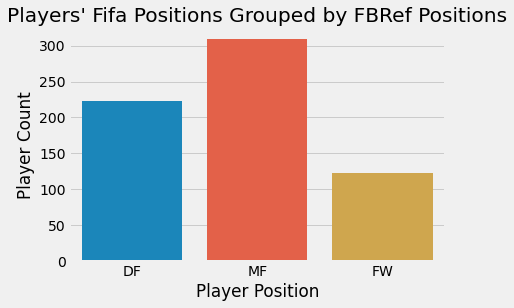

In [51]:
#DF = CB,RB,LB,RWB,LWB
#MF = CM,CAM,CDM,RM,LM
#FW = ST,RW,LW,CF
df_pos = 135+40+34+9+5
mf_pos = 87+85+71+33+33
fw_pos = 94+12+7+10
pos_data = [['DF',df_pos],['MF',mf_pos],['FW',fw_pos]]
pos_df = pd.DataFrame(pos_data, columns = ['Player Position','Player Count'])
ax = sns.barplot(x='Player Position',y='Player Count', data = pos_df)
ax.set_title(label = 'Players\' Fifa Positions Grouped by FBRef Positions')

In [52]:
combined.Pos.value_counts()

MF    253
DF    238
FW    164
Name: Pos, dtype: int64

Text(0.5, 1.0, "Players' Positions in FBRef and FIFA")

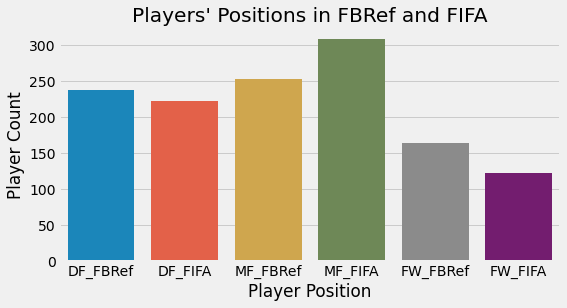

In [53]:
#DF = CB,RB,LB,RWB,LWB
#MF = CM,CAM,CDM,RM,LM
#FW = ST,RW,LW,CF

plt.figure(figsize=(8,4))
fbr_df = 238
fbr_mf=253
fbr_fw=164
pos_data = [['DF_FBRef', fbr_df],['DF_FIFA',df_pos],['MF_FBRef',fbr_mf],['MF_FIFA',mf_pos],['FW_FBRef',fbr_fw],['FW_FIFA',fw_pos]]
pos_df = pd.DataFrame(pos_data, columns = ['Player Position','Player Count'])
ax = sns.barplot(x='Player Position',y='Player Count', data = pos_df)
ax.set_title(label = 'Players\' Positions in FBRef and FIFA')

As you can see in this comparison, FIFA lists more players as primary midfielders than FBRef does. FBRef lists more defenders and forwards. One potential reason for this is that players who play in more ambiguous roles (e.g. winger and wing back) are categorized as midfielders by FIFA while FBRef lists them as a primary forward or a defender.

#### General Stat Breakdown

Text(0, 0.5, 'Player Count')

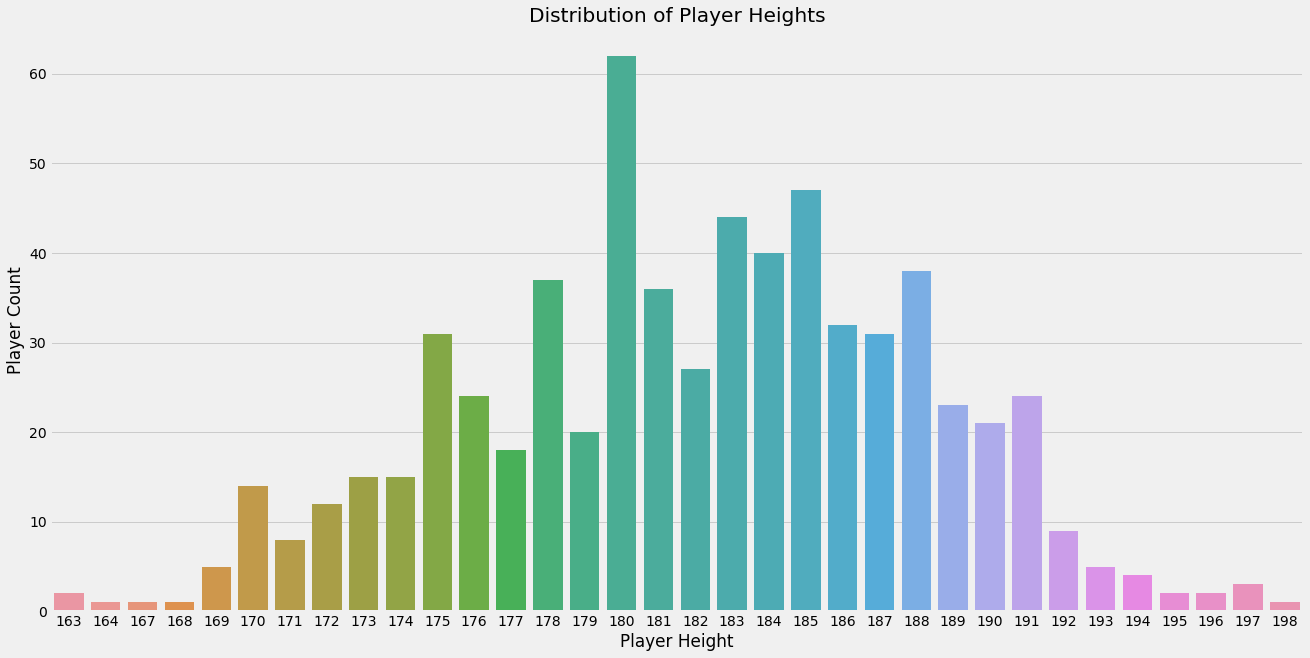

In [54]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'Height', data = combined)
ax.set_title(label = 'Distribution of Player Heights')
ax.set_xlabel(xlabel = 'Player Height')
ax.set_ylabel(ylabel = 'Player Count')

This unnatural distribution (especially at 180) indicates that some rounding has occurred, a notable flaw with the dataset that we need to keep in mind.

Text(0, 0.5, 'Player Count')

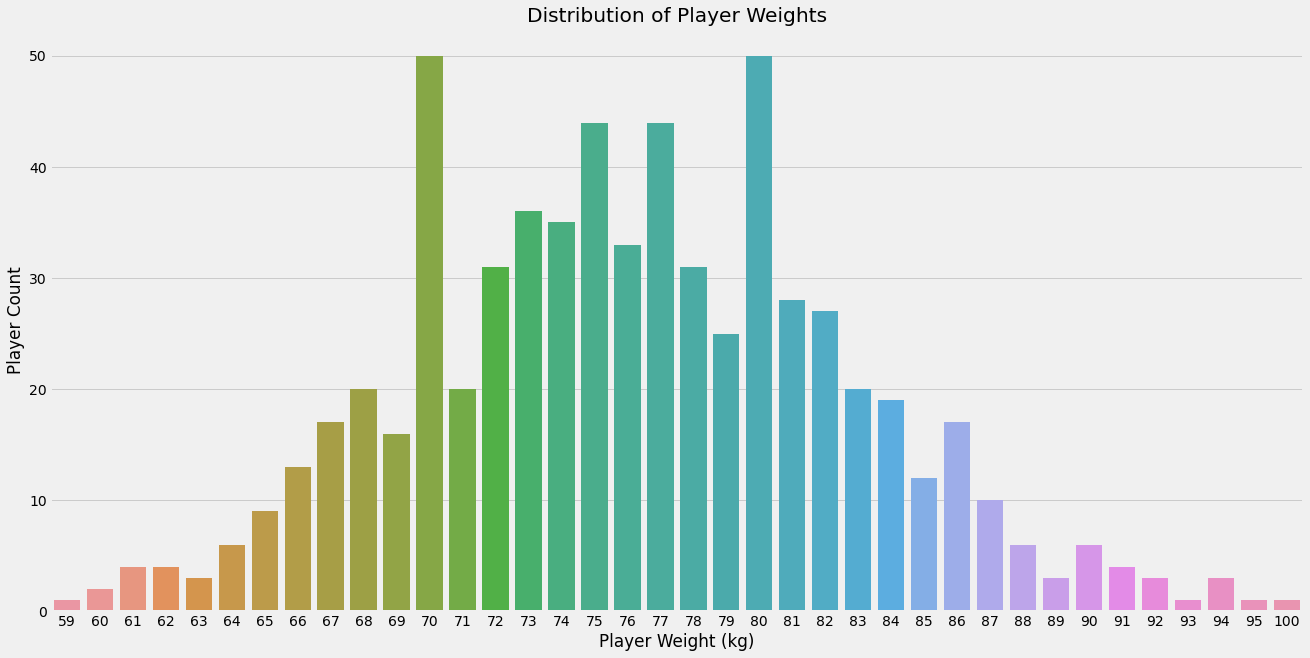

In [55]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'Weight', data = combined)
ax.set_title(label = 'Distribution of Player Weights')
ax.set_xlabel(xlabel = 'Player Weight (kg)')
ax.set_ylabel(ylabel = 'Player Count')

Again, this data indicates that more rounding has occurred, especially at 70 and 80.

Text(0, 0.5, 'Player Count')

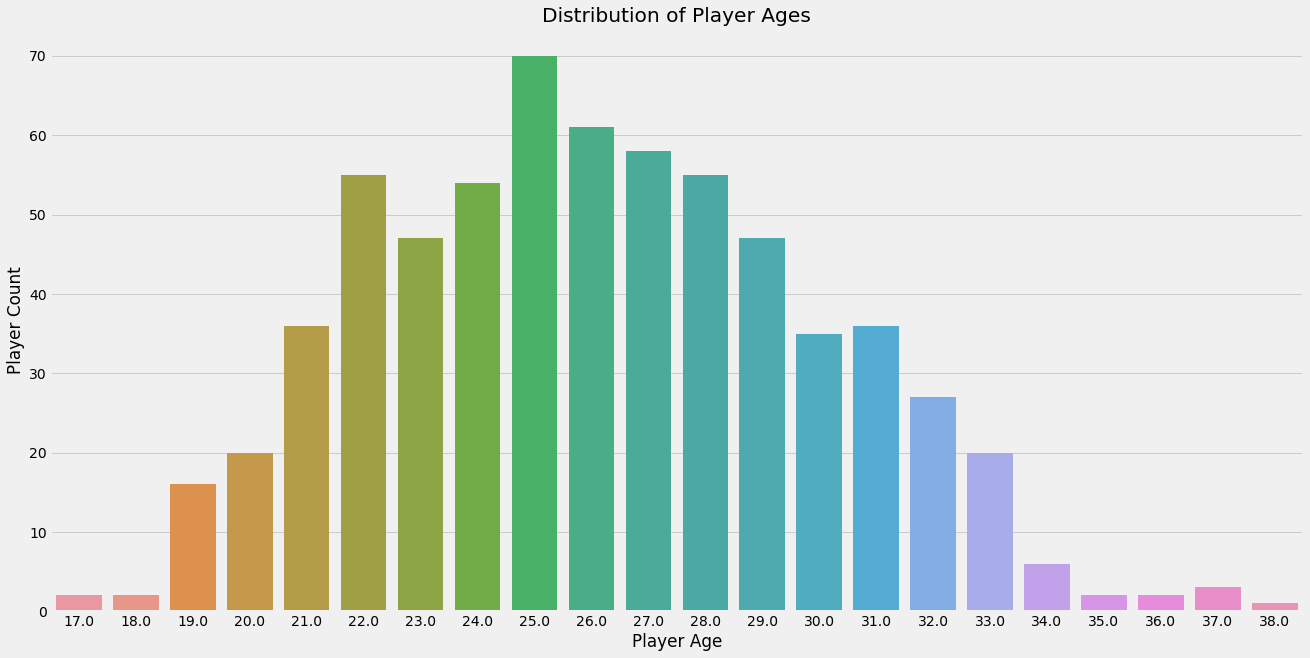

In [56]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'Age', data = combined)
ax.set_title(label = 'Distribution of Player Ages')
ax.set_xlabel(xlabel = 'Player Age')
ax.set_ylabel(ylabel = 'Player Count')

There are more younger players than older players.

Text(0, 0.5, 'Player FIFA Overall')

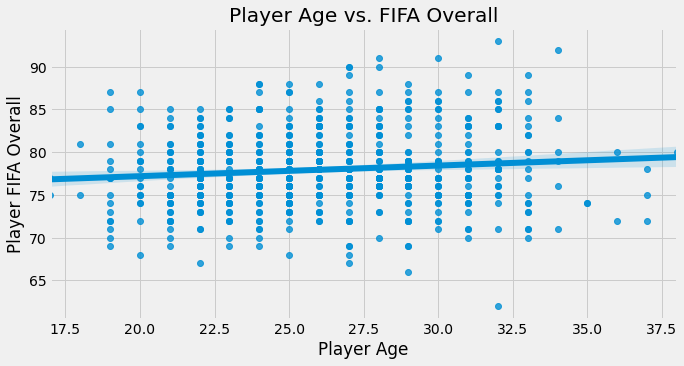

In [57]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x='Age',y='Overall', data = combined)
ax.set_title(label = 'Player Age vs. FIFA Overall')
ax.set_xlabel(xlabel = 'Player Age')
ax.set_ylabel(ylabel = 'Player FIFA Overall')

However, as players get older, their FIFA Overall also slightly increases.

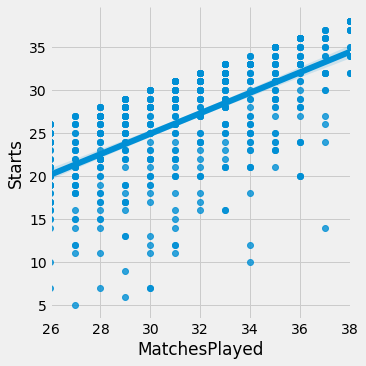

In [58]:
ax = sns.lmplot(x='MatchesPlayed',y='Starts', data=combined)

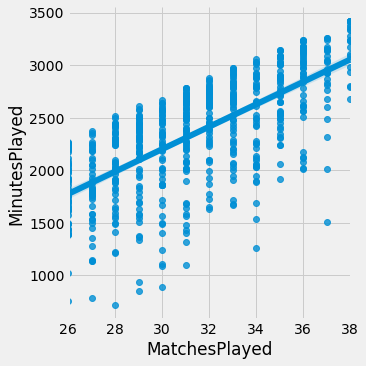

In [59]:
ax = sns.lmplot(x='MatchesPlayed',y='MinutesPlayed', data=combined)

These plots are mostly to verify that the data is correct. As expected, a player's matches played positively correlates with their starts and minutes played.

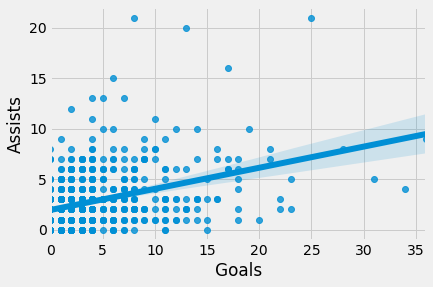

In [60]:
ax = sns.regplot(x='Goals',y='Assists', data=combined)

Players who score more tend to also assist more. Fun fact, the top right dot is Lionel Messi, widely regarded to be the best of all time.

## Analysis between FBRef and FIFA Data

Firstly, I'm going to look for correlations between FIFA's overall rating which indicates how good the character is overall and real FBRef data. I will also try and find the correlation between FIFA's rating for its 6 'main' categories of Pace, Shooting, Passing, Dribbling, Defending, and Physicality and FBRef's real world statistics.

In [61]:
overall_corr = fbref.corrwith(fifa.Overall)

In [62]:
overall_corr.head()

Age              0.106411
Height          -0.130437
Weight          -0.042805
MatchesPlayed    0.258310
Starts           0.266548
dtype: float64

In [63]:
overall_corr_df=pd.DataFrame({'Statistic':overall_corr.index,'Correlation with FIFA Overall':overall_corr.values})
overall_corr_df.sort_values('Correlation with FIFA Overall', ascending = False, inplace = True)
overall_corr_df.head()

,Statistic,Correlation with FIFA Overall
124,ReceivingTarg,0.636253
125,ReceivingRec,0.553429
121,Carries,0.512657
58,GCATypesPassLive,0.490487
56,GCA,0.475620


Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Overall')

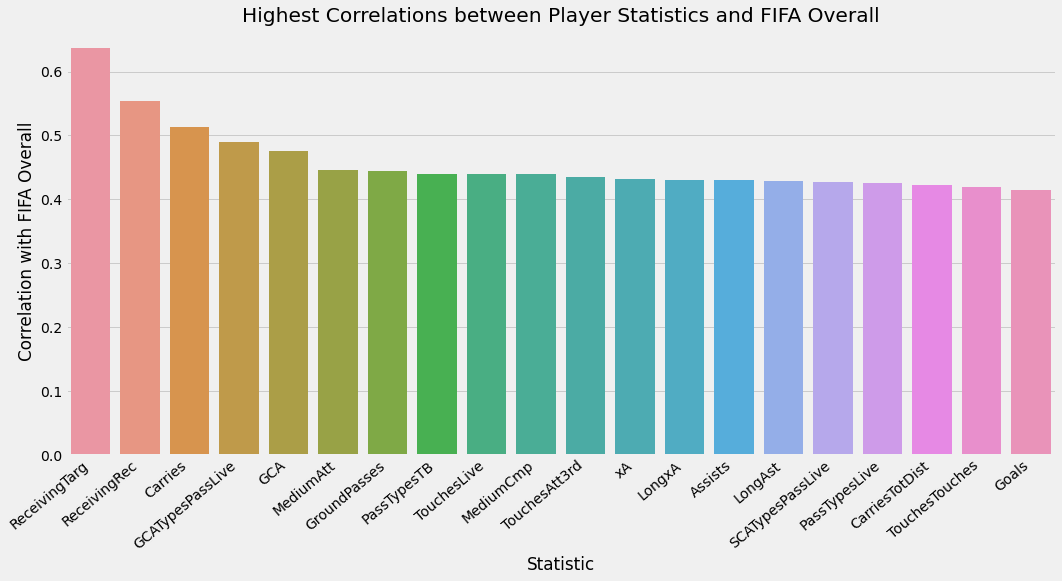

In [64]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Overall', data = overall_corr_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Overall')

Surprisingly, the real world-stat that is most positvely correlated with a player FIFA Overall rating is not a standard metric like goals or assists. In fact, the most correlated stat at a 0.64 correlation is in fact ReceivingTarg which measures how many times the player has been the target of a pass by a teammate. The next highest stat is ReceivingRec which is how many times the player successfully receives the pass. One way to interpret this is that better players will be searched for by teammates and will thus by the receiving target of more passes.

Text(0.5, 1.0, 'Lowest Correlations between Player Statistics and FIFA Overall')

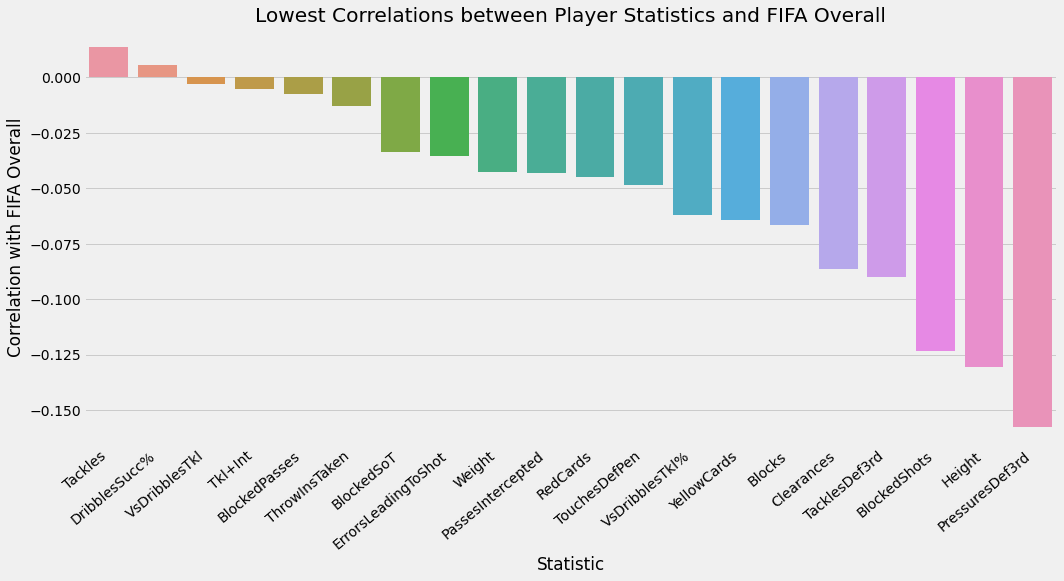

In [65]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Overall', data = overall_corr_df[120:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Lowest Correlations between Player Statistics and FIFA Overall')

There aren't many strong negative correlations between player stats and FIFA Overall. This is partially because the majority of real-world football data collected are positives events. There are only a few negative events recorded such as player errors and yellow/red cards. One thing to notice is that the majority of the stats with a negative correlation are defensive stats, which could be hinting that defensive players are rated lower than offensive players in FIFA.

Now I will repeat this correlation test for the correlation between player FIFA Pace stat and their real life stats.

In [66]:
pace = fbref.corrwith(fifa.PaceTotal)
shooting=fbref.corrwith(fifa.ShootingTotal)
passing=fbref.corrwith(fifa.PassingTotal)
dribbling=fbref.corrwith(fifa.DribblingTotal)
defending=fbref.corrwith(fifa.DefendingTotal)
physical=fbref.corrwith(fifa.PhysicalityTotal)


Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Pace')

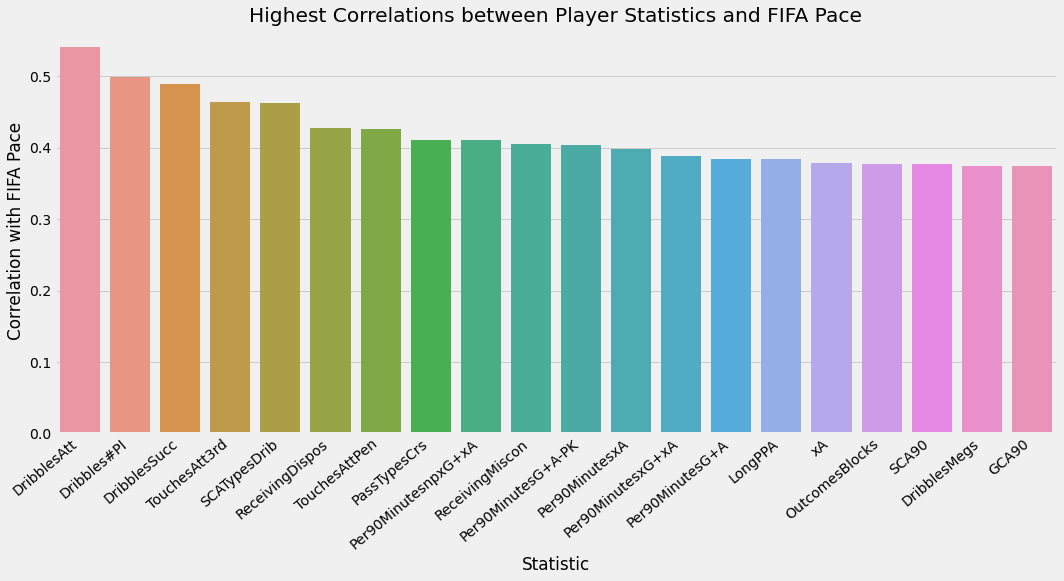

In [67]:
pace_df=pd.DataFrame({'Statistic':pace.index,'Correlation with FIFA Pace':pace.values})
pace_df.sort_values('Correlation with FIFA Pace', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Pace', data = pace_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Pace')

This data suggests that fast players tend to also be dribblers who attempt a lot of dribbles.

Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Shooting')

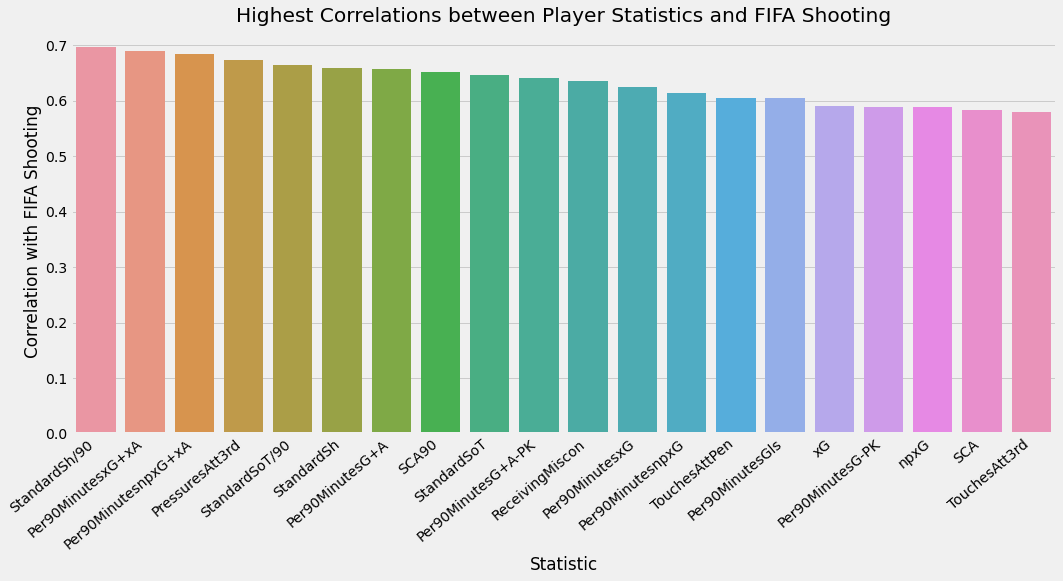

In [68]:
shooting_df=pd.DataFrame({'Statistic':shooting.index,'Correlation with FIFA Shooting':shooting.values})
shooting_df.sort_values('Correlation with FIFA Shooting', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Shooting', data = shooting_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Shooting')

The correlation between player stats and FIFA shooting rating seems to be a bit stronger than other ratings. Players who take more shots and who are expected to score more goals have higher shooting stats.

Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Passing')

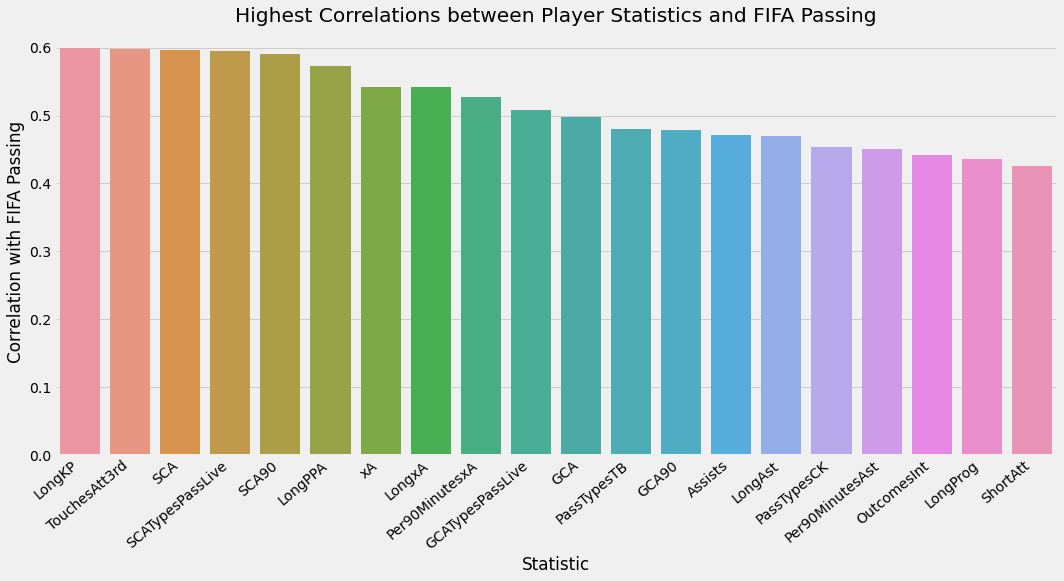

In [69]:
passing_df=pd.DataFrame({'Statistic':passing.index,'Correlation with FIFA Passing':passing.values})
passing_df.sort_values('Correlation with FIFA Passing', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Passing', data = passing_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Passing')

FIFA's passing rating seems to favor long passes over short passes.

Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Dribbling')

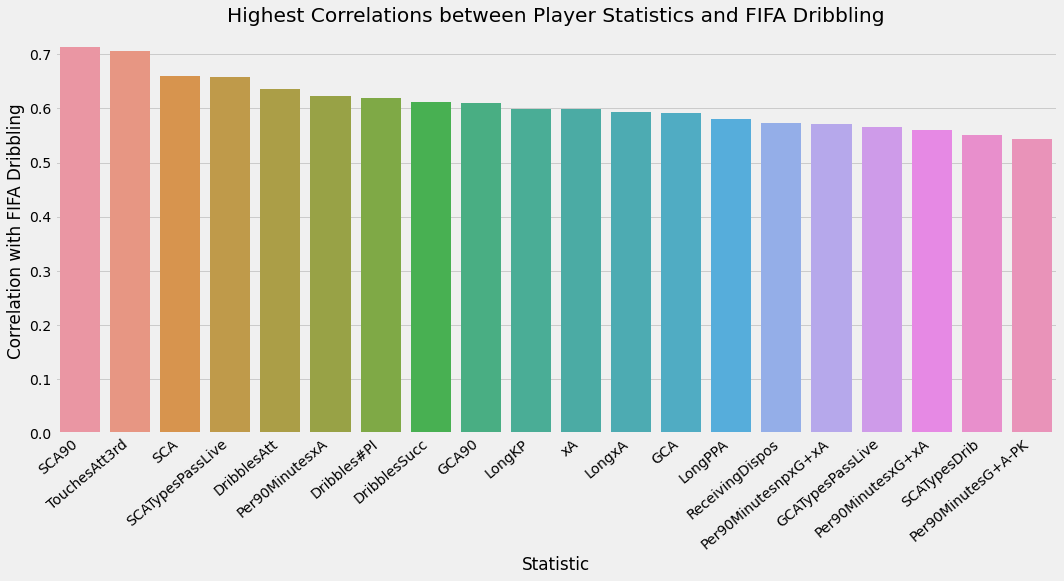

In [70]:
dribbling_df=pd.DataFrame({'Statistic':dribbling.index,'Correlation with FIFA Dribbling':dribbling.values})
dribbling_df.sort_values('Correlation with FIFA Dribbling', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Dribbling', data = dribbling_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Dribbling')

The real-life stats that are most positively correlated to FIFA dribbling are related to a player's shots created. Of course dribbling, can create shots, but I just thought it was interesting that a stat like Dribbles attempted or players passed by dribbling is not more highly correlated than shots created.

Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Defending')

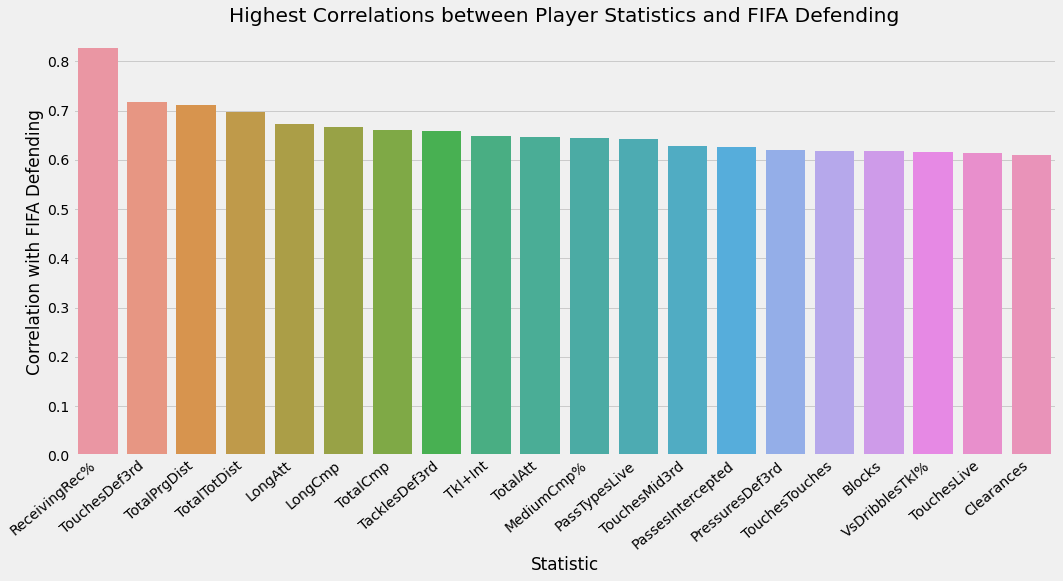

In [71]:
defending_df=pd.DataFrame({'Statistic':defending.index,'Correlation with FIFA Defending':defending.values})
defending_df.sort_values('Correlation with FIFA Defending', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Defending', data = defending_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Defending')

This has been the most surprising positive correlation so far. Passes Received % (the percentage of time a player successfully receives a pass) is the most positively correlated value with FIFA defending over a stat like Tackles + Interceptions. This graph shows multiple other passing-related metrics that are highly correlated with defending including for example total progressive pass distance and long pass attempts.

Text(0.5, 1.0, 'Highest Correlations between Player Statistics and FIFA Physicality')

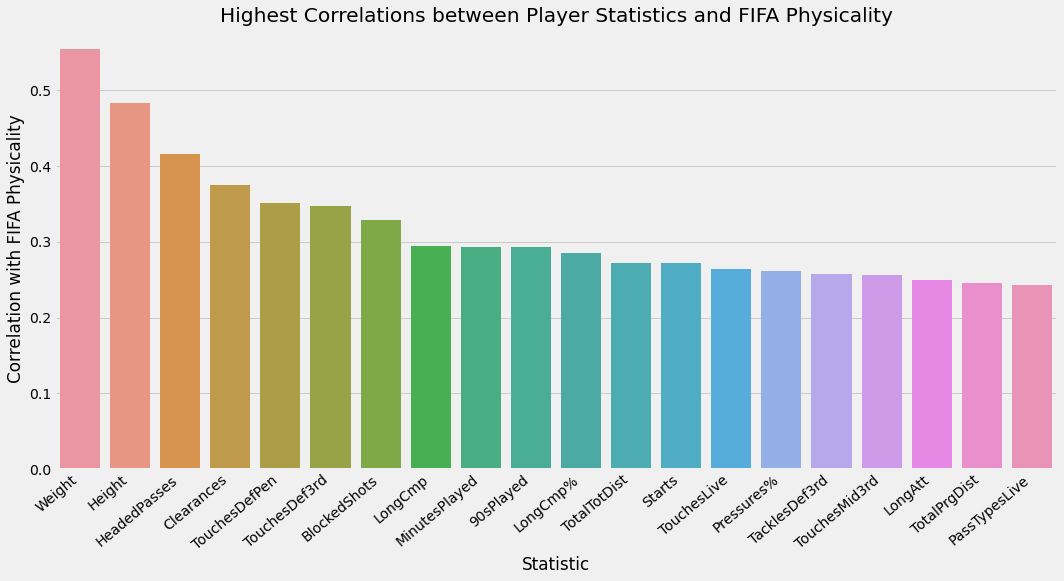

In [72]:
physical_df=pd.DataFrame({'Statistic':physical.index,'Correlation with FIFA Physicality':physical.values})
physical_df.sort_values('Correlation with FIFA Physicality', ascending = False, inplace = True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Statistic',y='Correlation with FIFA Physicality', data = physical_df[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Highest Correlations between Player Statistics and FIFA Physicality')

These have been the weakest correlations yet, indicating that FIFA might not base its Physicality ratings off of any stats recorded by FBRef.

#### Thoughts after EDA
After conducting exploratory data analysis, I'm currently most surprised by the correlation between FIFA's defense ratings and real life stats. It seems that good passing is highly correlated with FIFA defense rating which is something I would not have thought before doing this analysis. I have more questions that I want to answer such as do FIFA ratings favor certain leagues/nationalities more than they should or does it favor teams that are partnered with the game. These questions will be reflected in my preregistration statemenets below.

# Preregistration Statement

## Analysis 1

FIFA ratings come up surprisingly often in real football dicussions. They can consciously or even sub-consciously affect people's opinions of real life players. No-one can watch every single football game in every big league, so sometimes, people first become aware of a real-life player after seeing them in FIFA. Because of this, I want to properly analyze whether FIFA ratings are truly reflective of a player's real-world performance or if FIFA causes people to overrate some players and underrate others. I will try and build a model that predicts a player's main FIFA stats (overall, potential, pace, shooting, passing, dribbling, defending, and physicality) from real world data. The accuracy of this model will give some indication of how representative FIFA ratings are of real world performances. Additionally, I want to see whether non-playing factors such as Nationality affect how FIFA rate their players (e.g. Are European players rated higher than African players of the same caliber/real-world performances).

## Analysis 2

Every year, EA Sports makes a big deal out of revealing their ratings for FIFA. They make many videos asking players to react to their own FIFA ratings; some of these videos get several million views on YouTube. There's been a long-standing 'conspiracy' theory by FIFA players that FIFA rates players from clubs that are partnered with them higher and players from clubs that are partnered with their competitor eFootball PES lower. I want to test if this is true. I will obtain a list of clubs that are partnered with FIFA and with eFootball PES and see if FIFA rates these players differently from players not partnered with either game. Specifically, I'm looking for whether FIFA rates players that are partnered with FIFA higher and players that are partnered with eFootball PES lower.

# Model Building

To complete my preregistered analyses, I will first build a model that will predict a player's key FIFA stats (overall,pace, shooting, passing, dribbling, defending, and physicality) using their real life stats as inputs. This is necessary so that I can compare the model's results and the player's actual ratings.

In [84]:
inputs = fbref.columns

I will drop any 'demographic' information from my inputs such as the player's nation or name as this shouldn't theoretically have any direct impact on their ratings.

In [85]:
drops = ['Player','Nation','Pos','Team','League']
inputs = inputs.drop(drops)

In [93]:
combined_train, combined_test = train_test_split(combined, test_size = 0.2, random_state = 15)

I will start by building a model that predicts a player's FIFA overall rating from their real life stats.

In [94]:
model = LinearRegression().fit(combined_train[inputs],combined_train['Overall'])

I will now examine the regression coefficients of each input variable.

In [112]:
coefficients = pd.concat([pd.DataFrame(inputs),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

In [118]:
columns = ['variable','coef']
coefficients.columns = columns

In [127]:
coefficients.head()

,variable,coef
0,Age,0.045841
1,Height,-0.128520
2,Weight,0.004048
3,MatchesPlayed,-0.119251
4,Starts,-0.156529


In [134]:
coefficients.sort_values('coef', ascending = False)[:15]

,variable,coef
23,Per90MinutesnpxG,40.752746
21,Per90MinutesxA,35.630161
19,xA,33.064660
12,Per90MinutesGls,32.158585
16,Per90MinutesG+A-PK,24.733386
80,LongA-xA,16.801887
134,StandardG/Sh,6.062989
9,PenaltiesAtt,2.013000
138,ExpectedG-xG,1.891110
6,Goals,1.322244


It seems that the highest regression coefficient is in fact for the non penalty expected goals per 90 minutes variable. In fact, the majority of the top 10 highest regression slope is related to either goals or assists, what many would consider the two most basic and most important statistics in football because simply put, goals win games (and assists create goals). However, because so many input variables are being taken into account for this model, we shouldn't read into any one regression coefficient too much. I will now use this model to predict player's FIFA overall ratings on the test set.

In [160]:
pd.options.mode.chained_assignment = None 

In [161]:
model.predict(combined_test[inputs])

array([ 79.18268372,  74.24520544,  73.37147319,  79.25174929,
        77.97687647,  79.61706477,  77.14882475,  83.70115527,
        77.6015473 ,  79.47001313, 123.66296903,  88.18706635,
        79.84375643,  74.33015151,  79.96537014,  78.42983393,
        85.1322515 ,  76.92810363,  89.57436782,  76.39387691,
        67.70910575,  79.71979561,  78.51572861,  81.78972257,
        76.03046757,  78.3699894 ,  75.9089872 ,  78.32783582,
        70.99300354,  75.40985043,  79.11088866,  80.82536771,
        85.30929601,  75.72898196,  78.59625215,  80.97096216,
        78.94929099,  74.94341993,  82.55177942,  77.61233878,
        80.01907304,  75.85020733,  76.09981169,  76.87262425,
        85.55694478,  79.81258083,  72.83239965,  75.91261701,
        74.64560721,  76.22783906,  84.62182733,  88.06873104,
        75.51567205,  83.87524538,  74.52802518,  76.51302893,
        75.62826629,  86.79030112,  78.88737637,  76.63779211,
        74.51946572,  81.12479592,  72.56625635,  76.27

I will compare these predicted ratings with the actual ratings on the test set to see what the average difference between the two is and also what the prediction accuracy is (the number of correct predictions divided by the total number of predictions).

In [162]:
combined_test['PredictedOvr'] = model.predict(combined_test[inputs])

In [163]:
combined_test

,Player,Nation,Pos,Team,League,Age,Height,Weight,MatchesPlayed,Starts,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,Diff,RoundedPredicted
458,Nicolas Pépé,CIV,FW,Arsenal,Premier League,24.0,183,73,31,22,...,80,80,85,77,36,27,25,79.182684,2.817316,79.0
473,Ozan Kabak,TUR,DF,Schalke 04,Bundesliga,19.0,186,86,26,21,...,30,60,47,75,74,80,76,74.245205,2.754795,74.0
365,Luis Rioja,ESP,MF,Alavés,La Liga,25.0,175,68,28,19,...,70,65,69,59,42,26,28,73.371473,0.628527,73.0
396,Mark Noble,ENG,MF,West Ham,Premier League,32.0,177,76,33,32,...,64,78,92,77,71,74,75,79.251749,4.251749,79.0
387,Marco Mancosu,ITA,MF,Lecce,Serie A,30.0,180,77,33,28,...,73,73,68,66,31,46,42,77.976876,5.976876,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Goran Pandev,MKD,FW,Genoa,Serie A,36.0,184,75,34,18,...,78,71,68,70,23,40,35,77.508536,5.508536,78.0
304,Josip Iličić,SVN,FW,Atalanta,Serie A,31.0,190,79,26,21,...,85,87,78,80,53,32,26,86.919259,2.919259,87.0
239,Issa Diop,FRA,DF,West Ham,Premier League,22.0,194,92,32,31,...,42,43,44,72,77,80,81,73.833041,3.166959,74.0
357,Lucas Höler,GER,FW,Freiburg,Bundesliga,25.0,184,83,34,28,...,76,54,57,59,40,38,29,74.618797,3.618797,75.0


In [164]:
combined_test['Diff'] = abs(combined_test['Overall']-combined_test['PredictedOvr'])

In [165]:
print('The average absolute value diffence between our model\'s predicted overall and the player\'s actual FIFA overall is {:.2f}'.format(combined_test.Diff.mean()))

The average absolute value diffence between our model's predicted overall and the player's actual FIFA overall is 3.09


In [166]:
combined_test['RoundedPredicted'] = combined_test['PredictedOvr'].round()

In [167]:
n_correct = sum(combined_test.Overall == combined_test.RoundedPredicted)
n_total = len(combined_test)
print('The prediction accuracy is: {:.1%}'.format(n_correct/n_total))

The prediction accuracy is: 10.7%


As you can see, this model isn't very accurate. Ther average absolute value difference between our model's predictions and the player's actual overall is 3.09 which isn't terrible in my eyes but the model's prediction accuracy is only 10.7% which is very poor. This leads me to believe that a player's FIFA overall rating might be impacted by non-statistical factors as I mentioned in my preregistration analyses. I will now look into those.

# Preregistered Analyses

## Analysis 1: Testing whether a player's team, league, and nationality affect how they are rated in FIFA

In [185]:
finaldf = combined.copy()
finaldf['PredictedOvr'] = model.predict(finaldf[inputs])
finaldf['OvrDiff'] = finaldf.Overall - finaldf.PredictedOvr
finaldf.head()

,Player,Nation,Pos,Team,League,Age,Height,Weight,MatchesPlayed,Starts,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff
0,Aaron Cresswell,ENG,DF,West Ham,Premier League,29.0,175,66,31,31,...,75,60,68,59,71,74,78,79,77.893524,-0.893524
1,Aaron Mooy,AUS,MF,Brighton,Premier League,28.0,173,72,31,25,...,68,70,79,73,80,72,72,69,77.893182,-1.893182
2,Aaron Wan-Bissaka,ENG,DF,Manchester Utd,Premier League,21.0,183,72,35,34,...,83,69,64,56,76,82,85,90,79.828184,3.171816
3,Abdoulaye Doucouré,FRA,MF,Watford,Premier League,26.0,184,76,37,36,...,77,73,75,54,74,76,78,76,80.132802,-2.132802
4,Achraf Hakimi,MAR,DF,Dortmund,Bundesliga,20.0,181,73,33,29,...,78,75,74,46,79,67,74,76,85.683087,-2.683087


The above code uses my model to predict player's overall ratings and calculates the difference between their predicted overall and their actual overall. In this case, if a player's predicted rating is higher than their actual rating (they are underrated by FIFA), the OvrDiff value will be negative and if their predicted rating is lower than their actual rating (they are overrated by FIFA), the OvrDiff value will be positive.

### Testing effects of player's nationality

In [188]:
print('The average absolute value diffence between our model\'s predicted overall and the player\'s actual FIFA overall for this dataset is is {:.2f}'.format(abs(finaldf.PredictedOvr-finaldf.Overall).mean()))

The average absolute value diffence between our model's predicted overall and the player's actual FIFA overall for this dataset is is 2.11


To test the effects of a player's nationality, I will view the countries which have differences in predicted and actual overall higher than the average difference.

In [200]:
nationdf = finaldf.groupby(['Nation']).mean()
nationdf['size'] = finaldf.groupby(['Nation']).size()
nationdf.sort_values('OvrDiff',ascending = False)[:10]

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,size
Nation,,,,,,,,,,,,,,,,,,,,,
CTA,26.000000,188.000000,80.000000,27.000000,21.000000,1807.000000,1.000000,1.000000,0.000000,0.000000,...,77.000000,79.000000,45.000000,84.000000,77.000000,79.000000,80.000000,74.952620,4.047380,1
GAB,30.000000,187.000000,80.000000,36.000000,35.000000,3136.000000,22.000000,3.000000,2.000000,2.000000,...,93.000000,77.000000,78.000000,88.000000,27.000000,29.000000,36.000000,83.762380,3.237620,1
CMR,27.000000,185.000000,77.666667,31.000000,26.333333,2204.333333,1.000000,0.000000,0.000000,0.000000,...,61.000000,68.333333,46.333333,72.333333,74.000000,76.333333,73.000000,72.814107,3.185893,3
PAR,25.000000,174.000000,63.000000,36.000000,35.000000,3021.000000,4.000000,2.000000,0.000000,0.000000,...,75.000000,78.000000,69.000000,74.000000,49.000000,53.000000,49.000000,74.999582,3.000418,1
BIH,29.750000,184.000000,79.000000,29.250000,24.250000,2120.250000,4.750000,3.750000,0.000000,0.000000,...,72.000000,76.750000,67.000000,78.250000,69.750000,64.250000,58.250000,77.913597,2.086403,4
SEN,29.666667,181.000000,76.333333,33.333333,28.333333,2509.333333,6.666667,2.666667,0.000000,0.000000,...,74.666667,71.666667,61.333333,76.333333,65.000000,66.666667,63.666667,79.635762,2.030905,3
SVK,26.333333,186.666667,82.333333,31.333333,29.333333,2580.333333,2.000000,1.000000,0.666667,0.666667,...,52.333333,61.000000,51.000000,70.666667,81.333333,81.333333,77.666667,76.729790,1.603543,3
CHN,27.000000,174.000000,66.000000,33.000000,21.000000,1719.000000,4.000000,0.000000,0.000000,0.000000,...,82.000000,73.000000,53.000000,71.000000,34.000000,37.000000,31.000000,76.435817,1.564183,1
KVX,24.000000,184.500000,78.000000,32.000000,31.500000,2746.000000,4.000000,3.000000,1.000000,1.500000,...,62.000000,61.000000,53.500000,71.500000,66.500000,59.500000,58.000000,75.980888,1.519112,2


From the data above, we see that 4 countries are seemingly overrated by FIFA: the Central African Republic, Gabon, Cameroon, and Paraguay. However, upon examining the data more closely, it seems that there aren't very many players in this database from these countries (these countries 1,1,3, and 1 player(s) in this database respectively, so this could be attributed to sample size.

In [201]:
nationdf.sort_values('OvrDiff',ascending = True)[:10]

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,size
Nation,,,,,,,,,,,,,,,,,,,,,
CRO,26.000000,181.500000,75.200000,31.200000,24.6,2156.100000,4.700000,3.4,0.200000,0.200000,...,71.100000,70.5,64.400000,76.6,59.100000,63.7,58.000000,83.668280,-4.268280,10
SVN,29.000000,184.500000,74.000000,26.500000,20.0,1663.500000,8.000000,3.0,0.000000,0.000000,...,71.000000,77.5,67.500000,74.5,53.500000,42.5,38.000000,79.754268,-4.254268,2
GNB,21.000000,178.000000,70.000000,27.000000,20.0,1819.000000,0.000000,1.0,0.000000,0.000000,...,58.000000,66.0,57.000000,71.0,68.000000,72.0,68.000000,75.617725,-3.617725,1
ALB,27.500000,190.500000,83.500000,31.500000,30.0,2531.500000,2.000000,1.0,0.000000,0.500000,...,51.500000,59.5,53.000000,69.0,74.500000,74.5,69.500000,75.764306,-3.264306,2
FIN,29.000000,180.000000,80.000000,36.000000,33.0,2886.000000,11.000000,3.0,2.000000,2.000000,...,84.000000,71.0,72.000000,79.0,30.000000,29.0,16.000000,78.804412,-2.804412,1
TOG,25.000000,184.000000,78.000000,32.000000,20.0,2102.000000,6.000000,1.0,0.000000,0.000000,...,76.000000,68.0,67.000000,66.0,26.000000,35.0,33.000000,76.722570,-2.722570,1
MKD,30.000000,178.000000,69.500000,32.000000,20.5,1899.500000,8.000000,1.5,0.000000,0.000000,...,76.500000,75.0,73.000000,76.0,43.000000,52.5,49.000000,77.524049,-2.024049,2
AUS,28.000000,173.000000,72.000000,31.000000,25.0,2085.000000,2.000000,2.0,0.000000,0.000000,...,70.000000,79.0,73.000000,80.0,72.000000,72.0,69.000000,77.893182,-1.893182,1
CUB,26.000000,172.000000,76.000000,26.000000,14.0,1384.000000,1.000000,2.0,0.000000,0.000000,...,76.000000,69.0,53.000000,64.0,40.000000,38.0,17.000000,74.884847,-1.884847,1


There seems to be a few countries that are seemingly 'underrated' by FIFA, the most notable of which being Croation whose players are underrated by 4.27 ratings. The other countries which are seemingly underrated don't have a large enough player sample size to have any significant findings.

### Testing effects of player league

In [205]:
leaguedf = finaldf.groupby(['League']).mean()
leaguedf['Size'] = finaldf.groupby(['League']).size()
leaguedf

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
League,,,,,,,,,,,,,,,,,,,,,
Bundesliga,25.320000,182.808000,78.416000,29.952000,25.688000,2272.888000,4.432000,3.592000,0.240000,0.312000,...,67.416000,68.136000,57.688000,73.192000,61.104000,61.720000,58.624000,77.714952,-0.634952,125
La Liga,26.787356,180.522989,74.522989,31.804598,26.517241,2342.195402,3.534483,2.454023,0.540230,0.637931,...,69.310345,70.770115,59.896552,74.316092,64.000000,64.350575,60.534483,78.233630,0.547979,174
Premier League,25.619565,181.570652,75.559783,32.266304,27.576087,2447.010870,4.038043,2.679348,0.326087,0.402174,...,67.597826,70.527174,61.005435,75.891304,62.434783,64.135870,59.516304,78.298469,0.625444,184
Serie A,26.552326,183.534884,76.813953,31.279070,26.465116,2333.191860,4.552326,2.750000,0.715116,0.860465,...,63.831395,66.098837,59.017442,73.552326,63.348837,63.436047,60.430233,77.874285,-1.188238,172


These results show that the English Premier League and the Spanish La Liga are slightly overrated while the German Bundesliga and the Italian Serie A are slightly underrated with the Serie A being the most underrated league. This is very interesting to me as this is in order of the league's popularityboth in FIFA and in the real world. The English Premier League is the most popular football league in the world followed by the Spanish La Liga, the German Bundesliga and then the Italian Serie A. These results show that league popularity does have an effect on player's ratings in FIFA.

### Testing effects of player team

In [209]:
teamdf = finaldf.groupby(['Team']).mean()
teamdf['Size'] = finaldf.groupby(['Team']).size()
teamdf

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
Team,,,,,,,,,,,,,,,,,,,,,
Alavés,27.333333,181.777778,74.666667,31.111111,23.222222,2097.555556,3.000000,1.888889,0.666667,0.666667,...,66.777778,64.222222,57.666667,68.666667,54.888889,55.444444,53.333333,75.032490,0.300843,9
Arsenal,25.750000,181.125000,76.500000,30.250000,24.500000,2172.625000,5.250000,3.000000,0.375000,0.375000,...,73.375000,75.625000,67.125000,76.000000,56.875000,59.875000,57.000000,78.416127,2.333873,8
Aston Villa,24.250000,182.500000,72.625000,31.375000,26.750000,2346.375000,3.000000,3.000000,0.125000,0.250000,...,64.000000,69.875000,52.250000,70.750000,62.625000,65.625000,60.375000,74.463260,1.411740,8
Atalanta,26.769231,184.846154,79.692308,31.769231,24.538462,2197.846154,6.769231,3.692308,0.538462,0.692308,...,69.384615,67.307692,60.076923,75.230769,67.461538,65.538462,61.538462,80.379880,-1.379880,13
Athletic Club,27.500000,178.500000,76.250000,33.375000,30.875000,2712.250000,4.125000,1.875000,1.000000,1.125000,...,72.250000,72.875000,57.750000,77.875000,69.500000,70.125000,63.500000,79.426206,1.073794,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Watford,27.400000,184.200000,78.100000,28.900000,25.700000,2253.600000,2.500000,1.200000,0.700000,0.800000,...,64.000000,65.100000,58.900000,72.900000,63.600000,65.100000,64.200000,75.746120,0.353880,10
Werder Bremen,24.000000,180.000000,73.142857,29.142857,26.000000,2281.428571,3.857143,3.142857,0.428571,0.857143,...,68.714286,66.000000,59.285714,71.000000,60.571429,61.000000,57.000000,76.435258,-1.578115,7
West Ham,26.000000,183.875000,77.875000,32.500000,29.500000,2631.000000,2.750000,2.000000,0.375000,0.375000,...,59.375000,65.500000,58.875000,73.500000,70.250000,74.625000,73.750000,77.312624,0.312376,8


In [212]:
teamdf.sort_values('OvrDiff', ascending = False)[:10]

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
Team,,,,,,,,,,,,,,,,,,,,,
Tottenham,25.750000,181.125000,78.250000,30.875000,26.750000,2385.250000,3.375000,2.000000,0.250000,0.250000,...,68.250000,71.875000,63.250000,81.000000,67.500000,69.625000,68.125000,78.142739,3.982261,8
Atlético Madrid,24.500000,180.625000,74.875000,31.250000,22.750000,2017.750000,4.625000,2.625000,0.250000,0.375000,...,80.375000,79.125000,62.250000,79.750000,62.875000,56.500000,53.125000,78.355509,3.644491,8
Valencia,28.000000,180.750000,74.625000,30.000000,25.250000,2224.625000,2.875000,2.500000,0.625000,0.875000,...,75.250000,78.500000,66.375000,78.375000,67.750000,66.375000,65.500000,77.577766,3.172234,8
Newcastle Utd,25.000000,182.000000,75.500000,31.166667,28.333333,2421.500000,3.000000,2.333333,0.000000,0.000000,...,66.833333,69.333333,58.333333,75.500000,53.333333,56.166667,54.333333,74.262684,3.070649,6
Juventus,27.666667,184.166667,79.583333,31.333333,25.833333,2308.500000,5.416667,3.333333,1.083333,1.166667,...,71.500000,77.000000,67.750000,83.250000,66.083333,66.833333,63.166667,81.263051,2.653616,12
Arsenal,25.750000,181.125000,76.500000,30.250000,24.500000,2172.625000,5.250000,3.000000,0.375000,0.375000,...,73.375000,75.625000,67.125000,76.000000,56.875000,59.875000,57.000000,78.416127,2.333873,8
Inter,25.500000,182.875000,77.125000,31.750000,27.375000,2396.375000,6.500000,3.875000,1.000000,1.125000,...,65.625000,72.375000,67.250000,79.250000,69.375000,67.875000,65.250000,79.620407,2.254593,8
Getafe,28.142857,181.571429,73.857143,34.142857,31.571429,2692.571429,3.285714,2.285714,0.714286,0.857143,...,74.571429,71.428571,58.142857,73.428571,64.428571,64.285714,61.000000,76.696063,2.161080,7
M'Gladbach,23.714286,184.857143,78.714286,30.000000,25.571429,2238.428571,4.428571,3.571429,0.000000,0.142857,...,68.714286,71.142857,56.571429,72.142857,56.857143,60.714286,60.571429,77.449632,1.836082,7


In [213]:
teamdf.sort_values('OvrDiff', ascending = True)[:10]

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
Team,,,,,,,,,,,,,,,,,,,,,
Milan,23.571429,182.428571,76.285714,31.428571,24.142857,2176.285714,5.285714,3.000000,0.142857,0.142857,...,67.285714,69.428571,58.285714,76.857143,59.857143,62.571429,57.142857,85.340255,-6.768826,7
Lecce,29.000000,182.222222,77.444444,29.444444,24.888889,2180.555556,2.777778,2.222222,1.000000,1.222222,...,56.444444,58.888889,54.777778,66.333333,55.777778,58.666667,57.000000,75.158225,-4.713781,9
Paderborn 07,26.166667,181.000000,77.000000,29.833333,23.166667,2070.166667,2.333333,2.166667,0.000000,0.333333,...,64.833333,59.833333,54.166667,66.500000,54.333333,56.666667,50.500000,73.825961,-3.992627,6
SPAL,26.500000,189.500000,79.500000,32.750000,28.750000,2563.750000,4.000000,0.500000,1.250000,1.750000,...,60.500000,64.250000,59.500000,69.750000,62.750000,55.750000,51.500000,74.883915,-2.883915,4
Sassuolo,24.333333,180.666667,72.000000,31.500000,26.166667,2233.166667,7.500000,5.000000,0.666667,0.833333,...,68.333333,69.166667,63.666667,68.833333,54.500000,48.666667,49.000000,78.790309,-2.790309,6
Norwich City,24.625000,178.750000,72.750000,32.500000,28.500000,2531.625000,2.625000,1.250000,0.250000,0.250000,...,66.875000,64.125000,51.250000,72.125000,58.375000,58.125000,50.125000,75.872846,-2.747846,8
Fiorentina,23.777778,184.444444,77.111111,33.000000,29.111111,2592.777778,4.000000,2.444444,1.000000,1.222222,...,55.444444,57.555556,53.222222,72.888889,64.555556,65.111111,62.888889,76.984894,-2.540449,9
Hellas Verona,25.375000,183.375000,73.125000,34.375000,30.500000,2663.375000,2.375000,2.500000,0.375000,0.375000,...,63.625000,68.875000,53.625000,70.000000,66.875000,70.000000,68.375000,77.171546,-2.171546,8
Bologna,26.800000,183.300000,75.600000,30.000000,25.400000,2222.800000,3.400000,2.100000,0.300000,0.400000,...,56.200000,63.900000,56.700000,72.300000,62.800000,58.900000,55.100000,76.303285,-2.103285,10


This analysis shows that Tottenham are the most 'overrated' team in FIFA being overrated by 3.98 ratings while Milan is the most underrated team in FIFA being underrated by 6.77 ratings. It is interesting to note that both Tottenham and Milan are sponsored by EA but we will further explore this in the next analysis.

## Analysis 2: Testing whether players from FIFA-sponsored teams are rated relatively higher than players who aren't

For this analysis, I will be using a list of teams sponsored by FIFA and teams sponsored by their competitor eFootball PES from [this website](https://www.fifauteam.com/fifa-21-partner-clubs-exclusive-league-licenses/). I've also gone through this list and personally verified that these teams are partnered with FIFA by going through their youtube channels and seeing whether they have done promotional videos for the games.

In [219]:
teamdf.index

Index(['Alavés', 'Arsenal', 'Aston Villa', 'Atalanta', 'Athletic Club',
       'Atlético Madrid', 'Augsburg', 'Barcelona', 'Bayern Munich', 'Betis',
       'Bologna', 'Bournemouth', 'Brescia', 'Brighton', 'Burnley', 'Cagliari',
       'Celta Vigo', 'Chelsea', 'Crystal Palace', 'Dortmund', 'Düsseldorf',
       'Eibar', 'Eint Frankfurt', 'Espanyol', 'Everton', 'Fiorentina',
       'Freiburg', 'Genoa', 'Getafe', 'Granada', 'Hellas Verona', 'Hertha BSC',
       'Hoffenheim', 'Inter', 'Juventus', 'Köln', 'Lazio', 'Lecce', 'Leganés',
       'Leicester City', 'Levante', 'Leverkusen', 'Liverpool', 'M'Gladbach',
       'Mainz 05', 'Mallorca', 'Manchester City', 'Manchester Utd', 'Milan',
       'Napoli', 'Newcastle Utd', 'Norwich City', 'Osasuna', 'Paderborn 07',
       'Parma', 'RB Leipzig', 'Real Madrid', 'Real Sociedad', 'Roma', 'SPAL',
       'Sampdoria', 'Sassuolo', 'Schalke 04', 'Sevilla', 'Sheffield Utd',
       'Southampton', 'Torino', 'Tottenham', 'Udinese', 'Union Berlin',
       'Val

In [220]:
fifa_partners = ['Milan','Atlético Madrid','Dortmund','Chelsea','Inter','Liverpool','Manchester City','Real Madrid','Tottenham']
pes_partners = ['Bayern Munich','Barcelona',' Manchester Utd','Arsenal','Schalke 04','Juventus','Mallorca']

In [224]:
partnerdf = teamdf.copy()
fifa_partnersdf = partnerdf[partnerdf.index.isin(fifa_partners)]
fifa_partnersdf

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
Team,,,,,,,,,,,,,,,,,,,,,
Atlético Madrid,24.500000,180.625000,74.875000,31.250000,22.750000,2017.750000,4.625000,2.625000,0.250000,0.375000,...,80.375000,79.125000,62.250000,79.750000,62.875000,56.500000,53.125000,78.355509,3.644491,8
Chelsea,25.142857,181.857143,79.142857,33.285714,28.142857,2529.571429,5.428571,3.714286,1.000000,1.000000,...,69.857143,76.571429,69.714286,76.857143,60.142857,64.571429,57.142857,81.227800,0.200772,7
Dortmund,25.666667,182.111111,79.888889,30.777778,26.555556,2351.222222,5.111111,6.666667,0.000000,0.000000,...,70.888889,79.333333,59.333333,83.333333,68.222222,69.333333,68.444444,84.137908,-0.915685,9
Inter,25.500000,182.875000,77.125000,31.750000,27.375000,2396.375000,6.500000,3.875000,1.000000,1.125000,...,65.625000,72.375000,67.250000,79.250000,69.375000,67.875000,65.250000,79.620407,2.254593,8
Liverpool,25.583333,181.500000,74.166667,33.333333,27.833333,2481.250000,6.250000,5.083333,0.250000,0.250000,...,75.333333,77.833333,65.500000,83.000000,67.500000,69.916667,63.833333,84.933740,0.732927,12
Manchester City,27.300000,178.400000,70.900000,32.100000,25.300000,2256.700000,7.600000,6.200000,0.400000,0.800000,...,80.900000,82.300000,69.100000,84.300000,64.300000,61.800000,52.900000,85.813117,-0.113117,10
Milan,23.571429,182.428571,76.285714,31.428571,24.142857,2176.285714,5.285714,3.000000,0.142857,0.142857,...,67.285714,69.428571,58.285714,76.857143,59.857143,62.571429,57.142857,85.340255,-6.768826,7
Real Madrid,28.375000,181.875000,77.625000,33.625000,30.375000,2669.625000,6.125000,4.250000,1.375000,1.375000,...,74.000000,78.875000,68.000000,86.125000,75.875000,74.750000,71.625000,85.490656,1.634344,8
Tottenham,25.750000,181.125000,78.250000,30.875000,26.750000,2385.250000,3.375000,2.000000,0.250000,0.250000,...,68.250000,71.875000,63.250000,81.000000,67.500000,69.625000,68.125000,78.142739,3.982261,8


In [225]:
pes_partnersdf = partnerdf[partnerdf.index.isin(pes_partners)]
pes_partnersdf

,Age,Height,Weight,MatchesPlayed,Starts,MinutesPlayed,Goals,Assists,PenaltyGoals,PenaltiesAtt,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PredictedOvr,OvrDiff,Size
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,25.750000,181.125000,76.500000,30.250000,24.500000,2172.625000,5.250000,3.000000,0.375000,0.375000,...,73.375000,75.625000,67.125000,76.000000,56.875000,59.875000,57.000000,78.416127,2.333873,8
Barcelona,28.833333,180.500000,75.416667,31.166667,25.750000,2285.333333,5.833333,4.333333,0.500000,0.500000,...,77.166667,80.000000,65.333333,84.750000,72.500000,72.333333,69.000000,85.437117,0.146217,12
Bayern Munich,25.000000,181.142857,75.571429,31.000000,28.142857,2506.714286,9.428571,7.428571,0.714286,0.714286,...,79.857143,77.571429,64.285714,81.857143,64.571429,66.571429,61.285714,85.955825,-0.812968,7
Juventus,27.666667,184.166667,79.583333,31.333333,25.833333,2308.500000,5.416667,3.333333,1.083333,1.166667,...,71.500000,77.000000,67.750000,83.250000,66.083333,66.833333,63.166667,81.263051,2.653616,12
Mallorca,26.000000,181.000000,72.750000,34.375000,31.000000,2654.250000,3.500000,1.750000,0.625000,0.750000,...,61.625000,62.375000,55.875000,66.125000,55.750000,61.125000,56.625000,75.027327,-1.402327,8
Schalke 04,24.400000,182.800000,80.400000,29.400000,27.000000,2375.200000,2.000000,2.200000,0.200000,0.200000,...,61.000000,66.400000,62.200000,71.000000,72.800000,76.600000,74.000000,77.165487,-1.165487,5


In [228]:
print('The average diference between overall rating and predicted rating for FIFA partners is: {}'.format(fifa_partnersdf['OvrDiff'].mean()))
print('The average diference between overall rating and predicted rating for PES partners is: {}'.format(pes_partnersdf['OvrDiff'].mean()))


The average diference between overall rating and predicted rating for FIFA partners is: 0.516862092731373
The average diference between overall rating and predicted rating for PES partners is: 0.29215385942397093


Based on these results, it seems that FIFA overrates both teams that it sponsors and teams that PES sponsors on average. We have to keep in mind that these partnered teams are some of the biggest clubs in the world which is one other reason that they might be overrated. 

In [232]:
nomilan = fifa_partnersdf.copy()
nomilan.drop('Milan', inplace = True)
print('The average diference between overall rating and predicted rating for FIFA partners without Milan is: {}'.format(nomilan['OvrDiff'].mean()))

The average diference between overall rating and predicted rating for FIFA partners without Milan is: 1.4275731566510645


When we take away the outlier of Milan which is underrated by nearly 7 ratings according to FIFA, we see that FIFA does on average overrate it's partnered teams' players by 1.43 ratings.

# Significance

My current analysis shows that FIFA ratings aren't precisely representative of real life ratings. The average difference between my model's predicted rating is 3 which isn't terrible but definitely could be better. In the game, a rating difference of 3 is the difference between on okay player and a good player or a great player and an elite player. My model can only get predictions within the right ballpark.

The most significant finding from my preregistered analyses is that FIFA does overrate players from more popular leagues like the Premier League and the La Liga while it underrates players from relatively less popular leagues like the Bundesliga and the Serie A. This is significant because it shows how the perception of a player's skills is affected by their popularity, even in an supposedly objective measure like a FIFA overall rating. In FIFA, players from the Premier League and La Liga are a lot used than players from other leagues, so FIFA has an incentive to make these players better so they can get more sales. 

Another finding from my preregistered analyses is that FIFA rates players from teams that it sponsors relatively higher than it should. This is very interesting because FIFA does affect people's opinions of players in real life and the fact that it somewhat overrates players that they partner with has a tangible impact of players' public opinions.

# Limitations

Asides from the limitations mentioned above, one new limitation in my preregistration analysis is the small sample size for the teams that FIFA and PES sponsor which may lead to the results not being very conclusive. Overall, sample size is a big issue for this project.

# Conclusion

While nothing is conclusive because of the fairly small sample size, this analysis shows that FIFA ratings are only partially based on a player's real world statistics. While attempting to predict a player's FIFA overall rating based solely on their real world performances get you in the right ball park, other factors need to be taken into account including a player's popularity and whether they are sponsored by FIFA, and more analysis needs to be done on this topic in general.